# <font color="#dd0000">一. 簡介</font>

# 組員：NCTS 李維恩
## A. 主題：CNN 水果辨識
## B. 主題說明：隨意拍一張水果照片, 載入 水果辨識, 即能辨識出該照片中的水果是甚麼水果
## C. 實作方法：
   ### <font color="#0000FF">01. 利用 Google 圖片搜尋並批次下載水果圖片</font>
    從 Google 下載每種水果約 700 張圖片, 再用 人眼 尋找水果特徵, 刪除雜訊過多或非水果的圖片.
    以 3:1 的比例, 當作訓練及測試資料.
        
    經 人眼 篩選後, 共蒐集 14 種水果圖片:
    Apple(340張), Banana(168張), Cherry(378張), Grape(470張), Kiwi(211張), 
    Lemon(195張), Mango(134張), Orange(146張), Peach(211張), Pear(211張), 
    Pineapple(110張), Raspberry(191張), Strawberry(172張), Tomato(204張)
        
    圖片蒐集與處理步驟如下:
        a. 先安裝 google-images-download
        b. 再安裝並啟用 chromedriver
        c. 於 Anaconda Prompt 中, 執行指令
        d. 用人眼辨識篩選符合的圖片
        e. 將 非 jpg 圖片格式, 轉換成 jpg
        f. 更改圖片檔名
   ### <font color="#0000FF">02. 撰寫 Python 程式</font>
    Part 1: 使用 Google 搜尋來的水果圖片, 進行訓練辨識 (google-images-download) 
            (ref https://drive.google.com/file/d/1QKGBrWBDeXQ4qv6Y0_8CTdveSFZCCA5B/view?usp=sharing)
    Part 2: 使用 Kaggle 提供的水果圖片, 進行訓練辨識 
            (ref https://www.kaggle.com/moltean/fruits/downloads/fruits.zip/49)
    Part 3: 運用別人寫的 API, 試試辨識水果圖片 (VGG16)

## D. 小結：
    Part 1: 使用 Google 搜尋來的水果圖片, 進行訓練辨識
        a. 以人眼去除 非水果 圖片, 只剩 (果樹, 水果), 訓練後的準確率 23%.
        b. 以人眼去除 果樹 圖片, 只剩 (水果), 訓練後的準確率 61%. 
           (ref https://nbviewer.jupyter.org/github/WillNt2019/NCTS/blob/master/Final%20Project%20Practice%20b.ipynb)
        c. 去除不足 200張的 水果 圖片, 訓練後的準確率 83.9%. (如 Part 1 程式碼)
    Part 2: 使用 Kaggle 提供的水果圖片, 進行訓練辨識, 準確率 100%. (如 Part 2 程式碼)
    Part 3: 運用別人寫的 API, 號稱很厲害, 試試辨識水果圖片, 其辨識結果也非一定準確. (如 Part 3 程式碼)

## E. 心得：
    如果是自行在網路上抓圖片使用, 則其圖片需要有明確的水果特徵點,
    不容有其他雜訊, 而且需要有充足的圖片數(大約700張),
    這樣所訓練出來的辨識率會較高.

###############################################################################################################################

# <font color="#dd0000">二. 實作</font>

## <font color="#0000FF">01. 利用 Google 圖片搜尋並批次下載水果圖片</font>

### a. 先安裝 google-images-download

pip install google_images_download

### b. 再安裝並啟用 chromedriver (http://chromedriver.chromium.org/downloads)
chromedriver 執行檔的目的, 為允許批次下載超過 100 張的圖片

### c. 於 Anaconda Prompt 中, 執行指令

In [ ]:
googleimagesdownload --keywords "fruit banana" --limit 700 --chromedriver="chromedriver"

--keywords 是搜尋的關鍵字, --limit 是圖片的數量, --chromedriver 是指定 chromedriver 的位置

--size ">4MP" 可指定檔案的 Size, 可設定的參數如下:

'large','medium','icon',

'>400*300','>640*480','>800*600','>1024*768',

'>2MP','>4MP','>6MP','>8MP','>10MP','>12MP','>15MP','>20MP','>40MP','>70MP'

### d. 用人眼辨識篩選符合的圖片
是否為 非水果 圖片, 是否為 果樹 圖片, 是否為 單純的水果 圖片

### e. 將 非 jpg 圖片格式, 轉換成 jpg

In [1]:
# 載入圖檔處理
import glob
import os
import cv2 # pip install opencv-python

In [5]:
file_dir = "C:/Users/Will/FruitsImage/Training/Apple"

In [6]:
i = 1
for root, dirs, files in os.walk(file_dir): 
    for file in files:
        if os.path.splitext(file)[1] != '.jpg':            
            ori_image = file_dir + "/" + file
            chg_image = file_dir + "/temp_" + str(i) + "_" + os.path.splitext(file)[0] + ".jpg"
            
            img = cv2.imread(ori_image, cv2.IMREAD_COLOR)            
            cv2.imwrite(chg_image, img)
            
            if os.access(chg_image, os.F_OK):
                os.remove(ori_image)
                      
            i = i + 1

### f. 更改圖片檔名

In [7]:
i = 1
for root, dirs, files in os.walk(file_dir): 
    for file in files:
        ori_image = file_dir + "/" + file
        chg_image = file_dir + "/" + str(i) + os.path.splitext(file)[1]
        
        os.rename(ori_image, chg_image)

        i = i + 1

## <font color="#0000FF">02. 撰寫 Python 程式</font>

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Keras functions
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adadelta
from keras.preprocessing import image

Using TensorFlow backend.


In [5]:
# 載入並讀取 image 及 label id, target lable
def load_dataset(path):
    temp_img = []
    temp_label = []
    for os_path in glob.glob(path):
        img_label = os_path.split("/")[-1]
        for image_path in glob.glob(os.path.join(os_path, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (64, 64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            temp_img.append(image)
            temp_label.append(img_label.split("\\")[-1])
    
    temp_id = {v:k for k,v in enumerate(np.unique(np.array(temp_label)))}    
    label_id = np.array([temp_id[i] for i in np.array(temp_label)])
    target_label = {v:k for k,v in temp_id.items()}

    return np.array(temp_img), label_id, target_label

In [6]:
# 資料整理 正規化 將資料線性單位化至  [0,1] 。
def data_normalization(x_temp, y_temp, categorical):
    x_temp = (x_temp - x_temp.min()) / (x_temp.max() - x_temp.min())
    y_temp = keras.utils.to_categorical(y_temp, categorical)
    
    return x_temp, y_temp

In [7]:
# 實際照片辨識
def get_imginfo(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    
    # 正規化 將資料線性單位化至  [0,1] 。
    img_arr = (img_arr - img_arr.min()) / (img_arr.max() - img_arr.min())
    
    return img, img_arr

## Part 1：使用 Google 搜尋來的水果圖片, 進行訓練辨識

### a. 讀取 訓練 圖片

In [8]:
x_train_1, y_train_1, target_label_1 = load_dataset("FruitsImage/Training/*")

In [9]:
x_train_1.shape, len(x_train_1), len(y_train_1), len(target_label_1)

((748, 64, 64, 3), 748, 748, 3)

### 讀取 測試 圖片

In [10]:
x_test_1, y_test_1, _1 = load_dataset("FruitsImage/Test/*")

In [11]:
x_test_1.shape, len(y_test_1), len(y_test_1), len(_1)

((230, 64, 64, 3), 230, 230, 3)

### b. 整理 訓練及測試 圖片

In [12]:
x_train_1, y_train_1 = data_normalization(x_train_1, y_train_1, 3)
x_test_1, y_test_1 = data_normalization(x_test_1, y_test_1, 3)

(64, 64, 3)


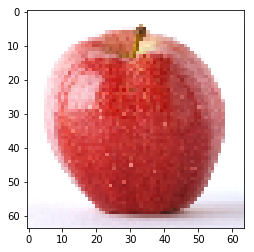

In [13]:
# 看看圖片樣子
print(x_train_1[200].shape)
plt.imshow(x_train_1[200])
plt.show()

### c. 設計 神經網路

In [14]:
# 建構我們的神經網路
model_1 = Sequential()

# filter, 矩陣
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3))) # padding 設成 same 是每個 filter 會輸出原來 64*64 一樣大小的矩陣。
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
# Max-Pooling!
model_1.add(MaxPool2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D(pool_size=(2, 2)))

model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D(pool_size=(2, 2)))

model_1.add(Conv2D(256, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# 將資料拉平成
model_1.add(Flatten())
# 神經元
model_1.add(Dense(128))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5)) # Dropout 在訓練中每次更新時， 將輸入單元的按比率隨機設置為 0，有助於防止過擬合
model_1.add(Dense(3))
model_1.add(Activation('softmax'))

# 檢視我們的神經網路
model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activat

### d. 編譯 神經網路

In [15]:
model_1.compile(loss="categorical_crossentropy", optimizer=Adadelta(), metrics=['accuracy'])

### e. 訓練 神經網路

In [19]:
model_fit_1 = model_1.fit(x_train_1, y_train_1, batch_size=512, epochs=5, verbose=1, validation_data = (x_test_1, y_test_1))

Train on 748 samples, validate on 230 samples
Epoch 1/5
748/748 [==============================] - 60s 80ms/step - loss: 0.0196 - acc: 0.9960 - val_loss: 0.6806 - val_acc: 0.8261
Epoch 2/5
748/748 [==============================] - 51s 68ms/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.7155 - val_acc: 0.8043
Epoch 3/5
748/748 [==============================] - 52s 69ms/step - loss: 0.0142 - acc: 0.9987 - val_loss: 0.6935 - val_acc: 0.8304
Epoch 4/5
748/748 [==============================] - 48s 65ms/step - loss: 0.0212 - acc: 0.9906 - val_loss: 0.6466 - val_acc: 0.8348
Epoch 5/5
748/748 [==============================] - 50s 67ms/step - loss: 0.0163 - acc: 0.9960 - val_loss: 0.6839 - val_acc: 0.8391


### f. 檢視 準確率

Test loss: 0.68385954214179
Test accuracy: 0.8391304342643074


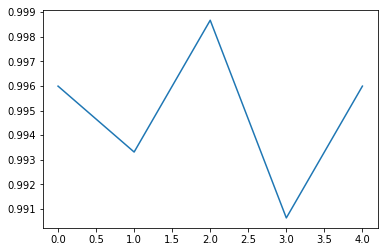

In [21]:
score_1 = model_1.evaluate(x_test_1, y_test_1, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

plt.plot(model_fit_1.history["acc"])

### g. 載入及辨識 實拍水果照片並顯示其水果名稱

In [22]:
img_1, img_arr_1 = get_imginfo("FruitsImage/Images/DSCN2770-1.jpg")

'Apple'

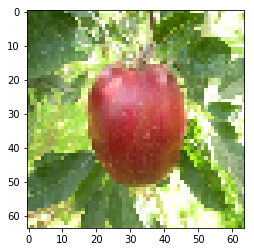

In [23]:
predict_1 = model_1.predict_classes(img_arr_1)
plt.imshow(img_1, cmap='Greys')
target_label_1[predict_1[0]]

## Part 2：使用 Kaggle 提供的水果圖片, 進行訓練辨識

In [24]:
x_train_2, y_train_2, target_label_2 = load_dataset("fruits/Training/*")

In [25]:
x_train_2.shape, len(x_train_2), len(y_train_2), len(target_label_2)

((7579, 64, 64, 3), 7579, 7579, 14)

In [26]:
x_test_2, y_test_2, _2 = load_dataset("fruits/Test/*")

In [27]:
x_test_2.shape, len(x_test_2), len(y_test_2), len(_2)

((2538, 64, 64, 3), 2538, 2538, 14)

In [28]:
x_train_2, y_train_2 = data_normalization(x_train_2, y_train_2, 14)
x_test_2, y_test_2 = data_normalization(x_test_2, y_test_2, 14)

(64, 64, 3)


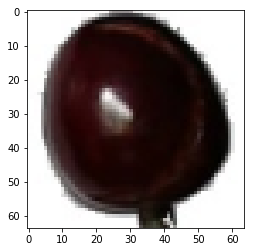

In [29]:
# 看看圖片樣子
print(x_train_2[1200].shape)
plt.imshow(x_train_2[1200])
plt.show()

In [30]:
# 建構我們的神經網路
model_2 = Sequential()

# filter, 矩陣
model_2.add(Conv2D(16, (3, 3), padding='same', input_shape=(64, 64, 3))) # padding 設成 same 是每個 filter 會輸出原來 64*64 一樣大小的矩陣。
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
# Max-Pooling!
model_2.add(MaxPool2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(0.3))

# 將資料拉平成
model_2.add(Flatten())
# 神經元
model_2.add(Dense(256))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5)) # Dropout 在訓練中每次更新時， 將輸入單元的按比率隨機設置為 0，有助於防止過擬合
model_2.add(Dense(14))
model_2.add(Activation('softmax'))

# 檢視我們的神經網路
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
__________

In [31]:
model_2.compile(loss="categorical_crossentropy", optimizer=Adadelta(), metrics=['accuracy'])

In [32]:
model_fit_2 = model_2.fit(x_train_2, y_train_2, batch_size=128, epochs=3, verbose=1, validation_data = (x_test_2, y_test_2))

Train on 7579 samples, validate on 2538 samples
Epoch 1/3
7579/7579 [==============================] - 183s 24ms/step - loss: 0.5308 - acc: 0.8956 - val_loss: 0.1016 - val_acc: 0.9673
Epoch 2/3
7579/7579 [==============================] - 182s 24ms/step - loss: 0.0200 - acc: 0.9947 - val_loss: 4.5490e-04 - val_acc: 1.0000
Epoch 3/3
7579/7579 [==============================] - 183s 24ms/step - loss: 0.0769 - acc: 0.9864 - val_loss: 9.6843e-05 - val_acc: 1.0000


Test loss: 9.684330647162375e-05
Test accuracy: 1.0


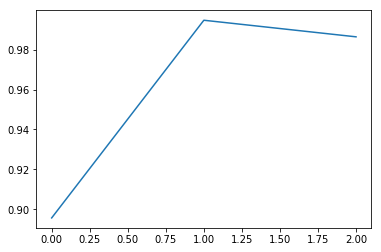

In [33]:
score_2 = model_2.evaluate(x_test_2, y_test_2, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

plt.plot(model_fit_2.history["acc"])

In [34]:
# 儲存 訓練結果
model_2.save('myCNNFruitModel.h5')

In [35]:
# 實際照片辨識
img_2, img_arr_2 = get_imginfo("FruitsImage/Images/DSCN2770-1.jpg")

'Pear'

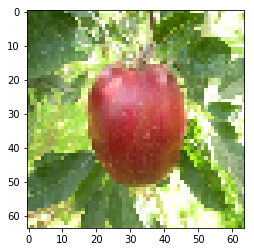

In [37]:
predict_2 = model_2.predict_classes(img_arr_2)
plt.imshow(img_2, cmap='Greys')
target_label_2[predict_2[0]]

## Part 3：運用別人寫的 API, 試試辨識水果圖片

In [38]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [39]:
model_VGG16 = VGG16(weights='imagenet', include_top=True) 

In [40]:
img_path_VGG16 = 'FruitsImage\\Images\\DSCN2770-1.jpg'

img_VGG16 = image.load_img(img_path_VGG16, target_size=(224, 224, 3))
img_arr_VGG16 = image.img_to_array(img_VGG16)
img_arr_VGG16 = np.expand_dims(img_arr_VGG16, axis=0)
img_arr_VGG16 = preprocess_input(img_arr_VGG16)

In [41]:
features = model_VGG16.predict(img_arr_VGG16)

In [42]:
print('Predicted:', decode_predictions(features, top=1)[0])

Predicted: [('n07753113', 'fig', 0.6615225)]


Text(0.5, 1.0, 'fig')

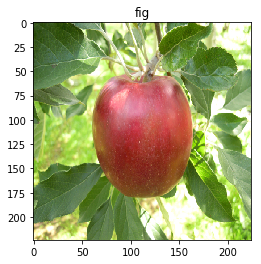

In [43]:
import matplotlib.pyplot as plt

plt.imshow(img_VGG16, cmap='Greys')
plt.title(decode_predictions(features, top=1)[0][0][1])

In [44]:
decode_predictions(features, top=1)[0][0][1]

'fig'

## <font color="#FF0000"> 要辨識的圖片其實是 Apple, 但辨識出 fig</font>